In [1]:
import pandas as pd
import numpy as np
from vega_datasets import data

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,temp,date,year,month,day,weekday
0,47.8,2010-01-01 00:00:00,2010,1,1,Friday
1,47.4,2010-01-01 01:00:00,2010,1,1,Friday
2,46.9,2010-01-01 02:00:00,2010,1,1,Friday
3,46.5,2010-01-01 03:00:00,2010,1,1,Friday
4,46.0,2010-01-01 04:00:00,2010,1,1,Friday


In [5]:
df = df.set_index('date').sort_index()
df

,temp,year,month,day,weekday
date,,,,,
2010-01-01 00:00:00,47.8,2010,1,1,Friday
2010-01-01 01:00:00,47.4,2010,1,1,Friday
2010-01-01 02:00:00,46.9,2010,1,1,Friday
2010-01-01 03:00:00,46.5,2010,1,1,Friday
2010-01-01 04:00:00,46.0,2010,1,1,Friday
...,...,...,...,...,...
2010-12-31 19:00:00,50.4,2010,12,31,Friday
2010-12-31 20:00:00,49.9,2010,12,31,Friday
2010-12-31 21:00:00,49.4,2010,12,31,Friday


<AxesSubplot:xlabel='date'>

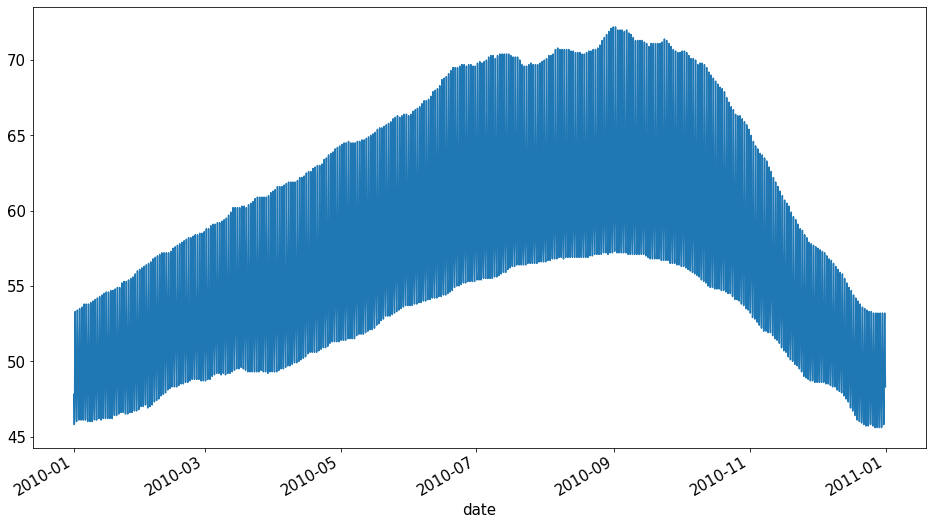

In [6]:
df.temp.plot()

# Temps data set

1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [7]:
by_day = df.resample('D').temp.mean()
by_day.head()

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
Freq: D, Name: temp, dtype: float64

<AxesSubplot:xlabel='date'>

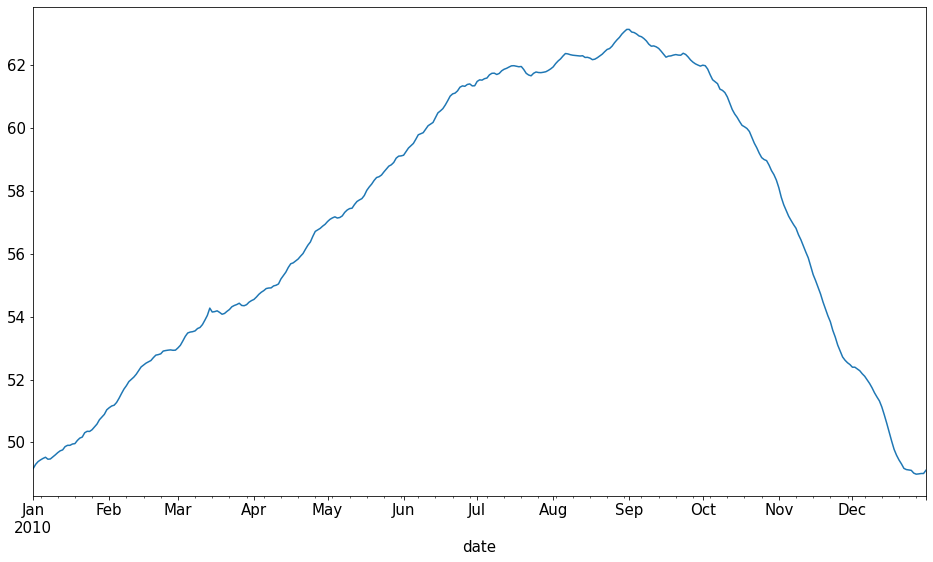

In [8]:
by_day.plot()

2. Write the code necessary to visualize the minimum temperature over time.


In [9]:
min_day = df.resample('D').temp.min()
min_day.head()


date
2010-01-01    45.8
2010-01-02    46.0
2010-01-03    46.1
2010-01-04    46.1
2010-01-05    46.1
Freq: D, Name: temp, dtype: float64

<AxesSubplot:xlabel='date'>

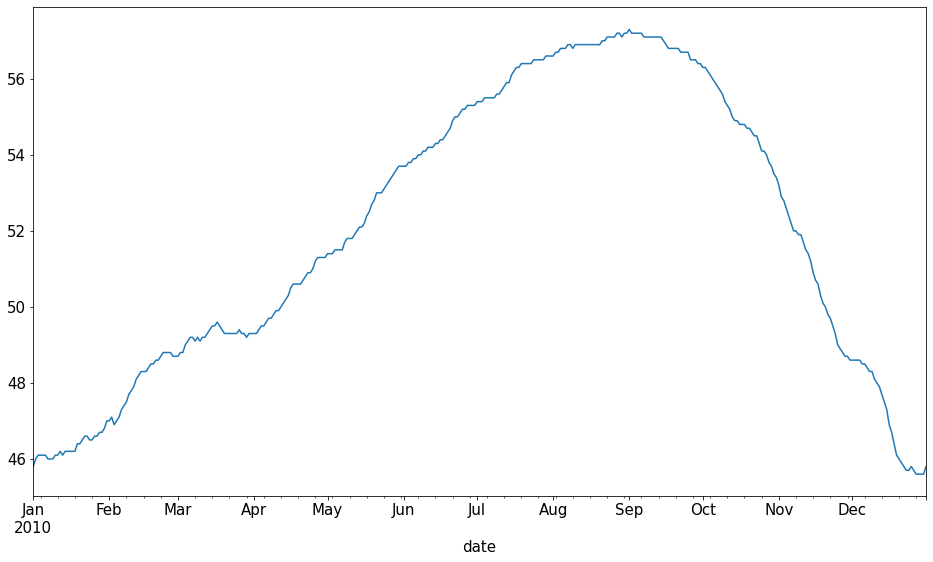

In [10]:
min_day.plot()

3. Write the code necessary to visualize the maximum temperature over time.


In [11]:
max_day = df.resample('D').temp.max()
max_day.head()


date
2010-01-01    53.3
2010-01-02    53.4
2010-01-03    53.5
2010-01-04    53.6
2010-01-05    53.8
Freq: D, Name: temp, dtype: float64

<AxesSubplot:xlabel='date'>

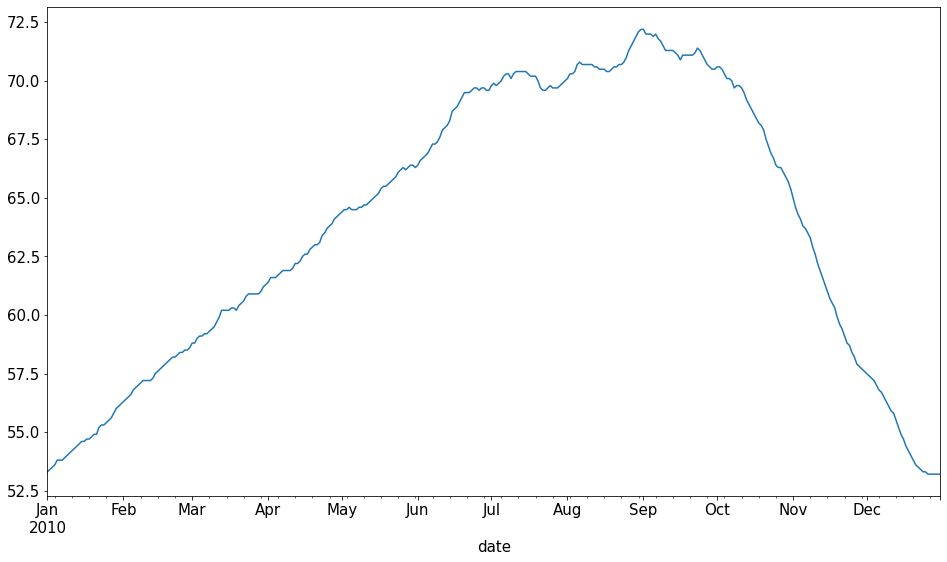

In [12]:
max_day.plot()

4. Which month is the coldest, on average?


In [13]:
by_month_min = df.resample('M').temp.mean().idxmin()
by_month_min

Timestamp('2010-01-31 00:00:00', freq='M')

In [14]:
df.resample('M').temp.mean().min()

49.98413978494623

5. Which month has the highest average temperature?


In [15]:
by_month_max = df.resample('M').temp.mean().idxmax()
by_month_max

Timestamp('2010-09-30 00:00:00', freq='M')

In [16]:
df.resample('M').temp.mean().max()

62.48708333333333

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [17]:
df_new = df.resample('D').temp.agg(['max','min'])
df_new.head()

,max,min
date,,
2010-01-01,53.3,45.8
2010-01-02,53.4,46.0
2010-01-03,53.5,46.1
2010-01-04,53.6,46.1
2010-01-05,53.8,46.1


In [18]:
df.head()

,temp,year,month,day,weekday
date,,,,,
2010-01-01 00:00:00,47.8,2010,1,1,Friday
2010-01-01 01:00:00,47.4,2010,1,1,Friday
2010-01-01 02:00:00,46.9,2010,1,1,Friday
2010-01-01 03:00:00,46.5,2010,1,1,Friday
2010-01-01 04:00:00,46.0,2010,1,1,Friday


In [19]:
df_new['change_in_temp'] = df_new['max']- df_new['min']

In [20]:
df_new.head()

,max,min,change_in_temp
date,,,
2010-01-01,53.3,45.8,7.5
2010-01-02,53.4,46.0,7.4
2010-01-03,53.5,46.1,7.4
2010-01-04,53.6,46.1,7.5
2010-01-05,53.8,46.1,7.7


In [21]:
df_new.resample('M').change_in_temp.mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: change_in_temp, dtype: float64

# Seattle

### How do we make pandas time aware so we can utilize the built in functionality for time series analysis?

#### 3 steps

* Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
* Set the datetime column as Index
* Sort the datetime index

### Convert to datetime

In [22]:
df=data.seattle_weather()

In [23]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [25]:
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


<AxesSubplot:xlabel='date'>

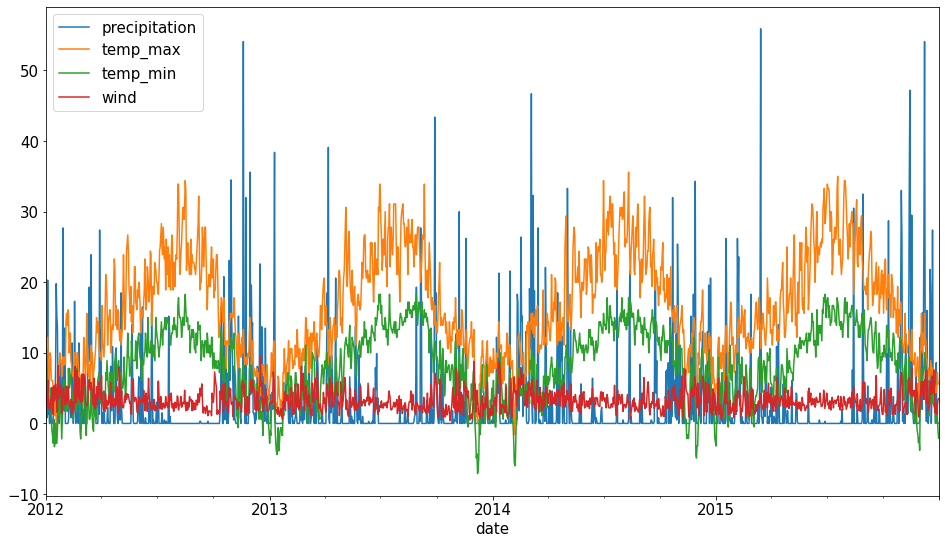

In [26]:
df.plot()

Which year and month combination has the highest amount of precipitation?


In [27]:
#Resample by month and sum the precipitation
df.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

In [28]:
#What is the maximum amount of precipitation?
df.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

In [29]:
#Take the index of the maximum value to find the month/year combination
df.resample('M').precipitation.sum().max()

284.5

In [30]:
#Take the index of the maximum value to find the month/year combination
df.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [31]:
#Use strftime to make the information easier to read
df.resample('M').precipitation.sum().idxmax().strftime('%B, %Y')

'December, 2015'

Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

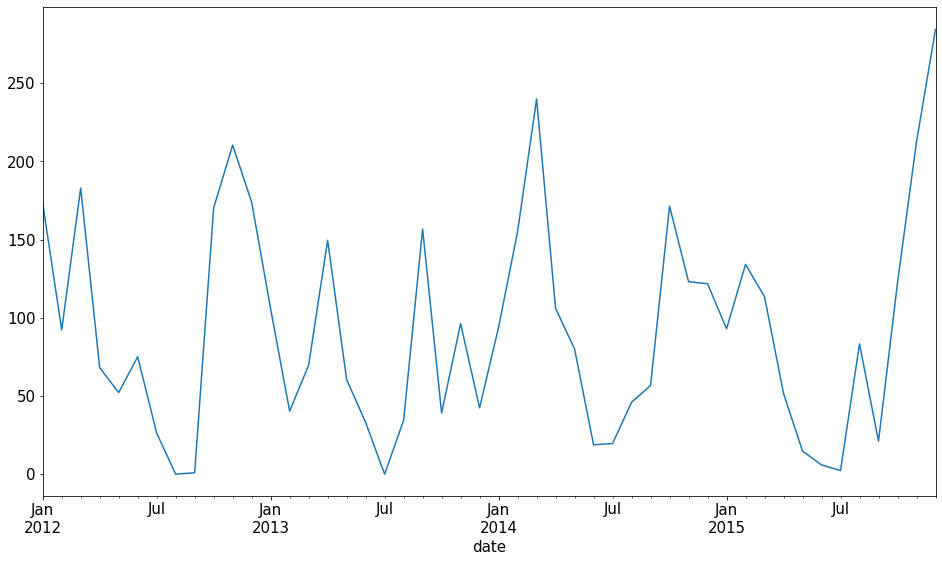

In [32]:
#Plot the monthly precipitation
df.resample('M').precipitation.sum().plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

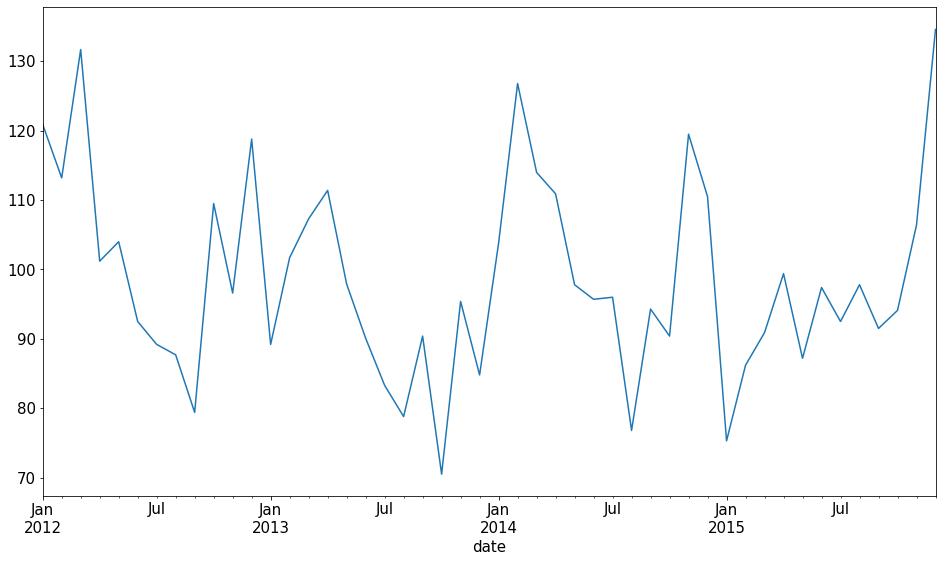

In [33]:
#Amount of wind per month
df.resample('M').wind.sum().plot()

Which year-month combination is the windiest?

In [34]:
#Resample data by month
df.resample('M').wind.sum()

date
2012-01-31    120.9
2012-02-29    113.2
2012-03-31    131.7
2012-04-30    101.2
2012-05-31    104.0
2012-06-30     92.5
2012-07-31     89.2
2012-08-31     87.7
2012-09-30     79.4
2012-10-31    109.5
2012-11-30     96.6
2012-12-31    118.8
2013-01-31     89.2
2013-02-28    101.7
2013-03-31    107.3
2013-04-30    111.4
2013-05-31     97.9
2013-06-30     90.1
2013-07-31     83.3
2013-08-31     78.8
2013-09-30     90.4
2013-10-31     70.5
2013-11-30     95.4
2013-12-31     84.8
2014-01-31    103.8
2014-02-28    126.8
2014-03-31    114.0
2014-04-30    110.9
2014-05-31     97.8
2014-06-30     95.7
2014-07-31     96.0
2014-08-31     76.8
2014-09-30     94.3
2014-10-31     90.4
2014-11-30    119.5
2014-12-31    110.5
2015-01-31     75.3
2015-02-28     86.2
2015-03-31     90.9
2015-04-30     99.4
2015-05-31     87.2
2015-06-30     97.4
2015-07-31     92.5
2015-08-31     97.8
2015-09-30     91.5
2015-10-31     94.1
2015-11-30    106.4
2015-12-31    134.6
Freq: M, Name: wind, dtype: float64

In [35]:
#Use idxmax to get the year/month combination
df.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [36]:
#Use strftime to extract the relevant information
df.resample('M').wind.sum().idxmax().strftime('%B, %Y')

'December, 2015'

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [37]:
#What values are in my weather column?
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [38]:
#Resample by year and take the value counts of weather
df.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

In which month does it rain the most?

In [39]:
#Resample by month and sum the precipitation
df.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

In [40]:
#Create a dataframe of this resampling
rain_by_month = pd.DataFrame(df.resample('M').precipitation.sum())
rain_by_month.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [41]:
#Create a new column containing the month
rain_by_month['month'] = rain_by_month.index.strftime('%B')

In [42]:
#Verify my new column exists
rain_by_month.head()

,precipitation,month
date,,
2012-01-31,173.3,January
2012-02-29,92.3,February
2012-03-31,183.0,March
2012-04-30,68.1,April
2012-05-31,52.2,May


In [43]:
#Group by the month and take the average precipitation
rain_by_month.groupby('month').precipitation.mean()

month
April         93.850
August        40.925
December     155.675
February     105.500
January      116.500
July          12.050
June          33.225
March        151.550
May           51.875
November     160.625
October      125.850
September     58.875
Name: precipitation, dtype: float64

In [44]:
#Use idxmax to get the month
rain_by_month.groupby('month').precipitation.sum().idxmax()

'November'

Which month has the most number of days with a non-zero amount of precipitation?

In [45]:
#Create a new column that records whether or not it rained at all
df['did_rain'] = np.where(df['precipitation'] == 0, 0, 1)
df.head()

,precipitation,temp_max,temp_min,wind,weather,did_rain
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [46]:
#Resample by month
df.resample('M').did_rain.sum()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: did_rain, dtype: int64

In [47]:
#Resample by month, look at the sum of did_rain, and extract the month and year
df.resample('M').did_rain.sum().idxmax().strftime('%B, %Y')

'December, 2012'

In [49]:
#Create a new df of the data resampled by month
did_rain_df = pd.DataFrame(df.resample('M').did_rain.sum())
did_rain_df.head()

,did_rain
date,
2012-01-31,22
2012-02-29,19
2012-03-31,22
2012-04-30,17
2012-05-31,10


In [50]:
#Create a month column
did_rain_df['month'] = did_rain_df.index.strftime('%B')
did_rain_df.head()

,did_rain,month
date,,
2012-01-31,22,January
2012-02-29,19,February
2012-03-31,22,March
2012-04-30,17,April
2012-05-31,10,May


In [51]:
#Group by month to find the rainiest month
did_rain_df.groupby('month').did_rain.sum()

month
April        59
August       22
December     81
February     73
January      66
July         11
June         37
March        73
May          34
November     71
October      61
September    35
Name: did_rain, dtype: int64

In [52]:
#Use idxmax to return the month
did_rain_df.groupby('month').did_rain.sum().idxmax()

'December'